In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from colorspacious import cspace_converter
from collections import OrderedDict

In [4]:
G=nx.Graph() # marvel graph

In [5]:
mar=open('C:\\Users\\Ines\\Desktop\\porgat.txt','r')

In [6]:
for i, line in enumerate(mar):
	if i>0 and i<19429:
		boo=False
		lab=''
		for ch in line.rstrip():
			if not boo:
				if ch==' ':
					boo=True				
			else:
				lab+=ch
		lab=lab.replace('\"','')
		if i<=6486:
			G.add_node(i,label=lab,ntype='character')
	
		else:
			G.add_node(i,label=lab,ntype='book')
		


	elif i>19429: #line 19429 indicates that the following lines will have the edges
		m=line.rstrip().split()
		k=m.pop(0)
		while len(m)>0:
			l=m.pop(0)
			G.add_edge(int(k),int(l))

In [7]:
characterG=nx.projected_graph(G,list(range(1, 6486+1)) , multigraph=False) #characters "social" network
bookG=nx.Graph()#books connected by a same character

In [10]:
'''Bipartite Graph'''
Gdegrees = nx.degree_centrality(G)
Glabel=nx.get_node_attributes(G,'label')
Gntype=nx.get_node_attributes(G,'ntype')

In [11]:
#Degree centraility
print(max(Gdegrees.items(), key = lambda x:x[1]))
print("Node with highest degree centrality: "+Glabel[5306]+"\nType: "+Gntype[5306])

(5306, 0.08364647140577547)
Node with highest degree centrality: SPIDER-MAN/PETER PAR
Type: character


In [8]:
'''Character Network'''
cdegrees = nx.degree_centrality(characterG)
clabel=nx.get_node_attributes(characterG,'label')

In [13]:
print("CHARACTERS")
print("number of nodes: "+str(characterG.number_of_nodes()))
print("number of edges: "+str(characterG.number_of_edges()))

CHARACTERS
number of nodes: 6486
number of edges: 168267


In [14]:
cliquelist=list(nx.find_cliques(characterG))

In [26]:
cliquen=nx.graph_clique_number(characterG)

In [27]:
print("maximum clique: "+str(cliquen))

maximum clique: 111


In [28]:
print(nx.is_connected(characterG))

False


In [45]:
nx.number_connected_components(characterG)

23

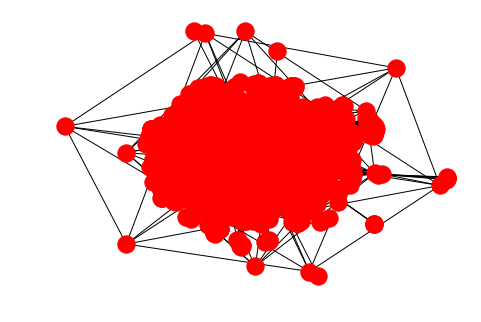

In [46]:
connectlist=list(nx.connected_component_subgraphs(characterG))
i=0
while i<23:
    nlist=connectlist[i]
    nx.nx.draw(nx.subgraph(characterG, nlist))
    i+=1
    

In [34]:
#nx.draw(nx.subgraph(characterG, connectlist[0]), cmap="YlGnBu", edge_color='darkgray', labels=nx.get_node_attributes(characterG, 'label'), node_size=50)

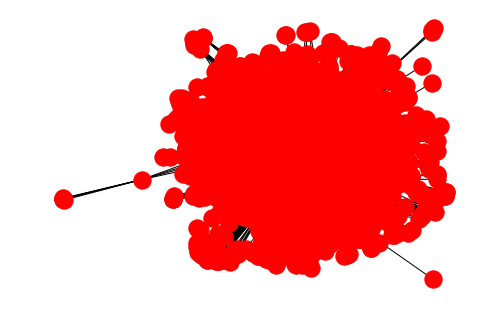

In [48]:
nx.nx.draw(nx.subgraph(characterG, connectlist[1]))

In [36]:
degfreq=nx.degree_histogram(characterG)
print(degfreq)

[19, 53, 86, 106, 148, 183, 178, 185, 234, 224, 245, 256, 188, 196, 157, 197, 125, 141, 128, 109, 131, 119, 84, 95, 83, 112, 70, 76, 73, 71, 66, 49, 44, 44, 57, 43, 48, 40, 61, 60, 38, 45, 39, 31, 38, 27, 39, 22, 58, 35, 30, 18, 22, 20, 32, 25, 25, 16, 27, 29, 23, 21, 19, 10, 22, 16, 26, 16, 24, 20, 18, 13, 14, 29, 12, 7, 12, 17, 16, 20, 16, 14, 8, 12, 14, 10, 15, 14, 9, 36, 11, 9, 10, 5, 13, 6, 5, 11, 7, 4, 8, 6, 8, 3, 4, 6, 9, 4, 8, 6, 10, 6, 3, 3, 6, 2, 4, 4, 9, 6, 11, 2, 5, 7, 4, 6, 6, 6, 9, 2, 7, 2, 2, 4, 5, 4, 5, 5, 6, 6, 6, 3, 10, 5, 3, 7, 3, 4, 4, 5, 4, 4, 7, 3, 1, 0, 3, 4, 3, 2, 0, 2, 4, 2, 6, 1, 4, 3, 0, 6, 1, 5, 3, 1, 0, 5, 4, 1, 2, 1, 2, 3, 3, 3, 3, 3, 1, 5, 2, 3, 3, 3, 1, 1, 0, 3, 2, 1, 1, 1, 4, 3, 0, 1, 3, 1, 7, 0, 4, 1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 6, 1, 1, 1, 1, 2, 2, 3, 2, 0, 3, 2, 0, 1, 3, 1, 3, 0, 2, 0, 0, 0, 1, 2, 1, 4, 2, 0, 0, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 2, 2, 3, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 

In [19]:
deglist=list(range(0,1934))

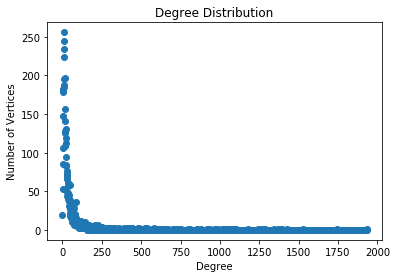

In [35]:
plt.scatter(deglist,degfreq)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Vertices')
plt.show()

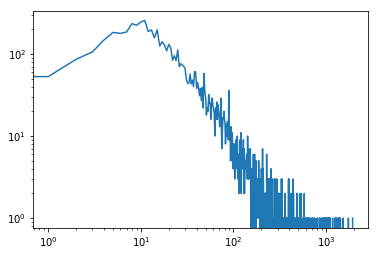

In [29]:
plt.loglog(deglist, degfreq, data=None)

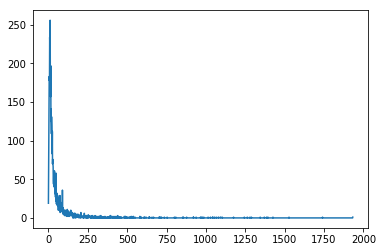

In [30]:
plt.plot(deglist, degfreq, data=None) #degree